In [103]:
import numpy as np
from pathlib import Path
from torchvision import transforms
import PIL
from PIL import Image
import matplotlib.pyplot as plt
from tifffile import TiffFile


%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
PIL.PILLOW_VERSION

'5.3.0'

In [14]:
PIL.VERSION

'1.1.7'

## regular image

### open and show image

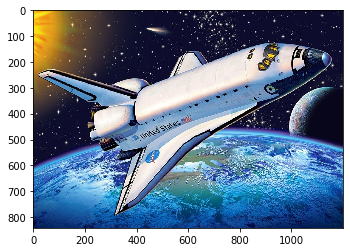

In [7]:
filepath = Path.home() / 'Desktop/space-shuttle.jpg'
img = Image.open(filepath)
plt.imshow(img);

In [9]:
# size of an image in pixels
img.size

(1200, 842)

### convert to numpy array

In [10]:
img_arr = np.array(img)

In [11]:
img_arr.shape

(842, 1200, 3)

In [16]:
img_arr[0, 0, :]

array([255, 224,   7], dtype=uint8)

### transform

In [41]:
train_transforms = transforms.Compose([
    transforms.RandomRotation(degrees=30, resample=PIL.Image.NEAREST)
])

In [46]:
img_transf = train_transforms(img)

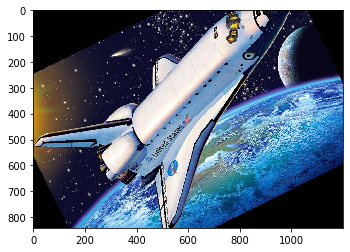

In [47]:
plt.imshow(img_transf);

In [57]:
train_transforms = transforms.Compose([
    transforms.RandomAffine(degrees=90, 
                            translate=(.8, .3), 
                            resample=PIL.Image.NEAREST)
])

In [60]:
img_transf = train_transforms(img)

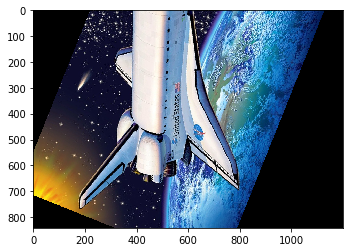

In [61]:
plt.imshow(img_transf);

### tensor

What do we do when transform an image into a tensor? Well we may see that:

- we change it shape (the number of channels is now in the first place);
- we also normalize `RGB` values - basically just divide by 255;

In [62]:
train_transforms = transforms.Compose([
    transforms.ToTensor()
])

In [63]:
img_tensor = train_transforms(img)

In [65]:
img_arr.shape, img_tensor.shape

((842, 1200, 3), torch.Size([3, 842, 1200]))

In [66]:
img_arr[0, 0, :]

array([255, 224,   7], dtype=uint8)

In [67]:
img_tensor[:, 0, 0]

tensor([1.0000, 0.8784, 0.0275])

In [69]:
224 / 255, 7 / 255

(0.8784313725490196, 0.027450980392156862)

But how can we plot this tensor? We have to use `transpose` (`permute` in pytorh) (do not use `reshape`).

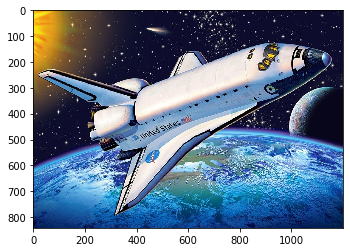

In [71]:
plt.imshow(img_tensor.permute(1, 2, 0));

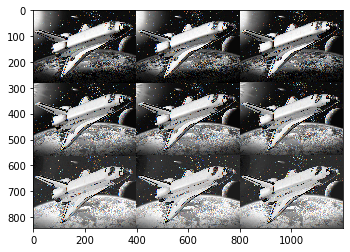

In [72]:
plt.imshow(img_tensor.reshape(842, 1200, 3));

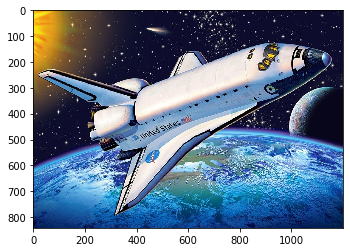

In [95]:
plt.imshow(transforms.ToPILImage()(img_tensor));

In [96]:
img_tesor_to_pil = transforms.ToPILImage()(img_tensor)

In [99]:
img_tesor_to_pil_arr = np.array(img_tesor_to_pil)

In [100]:
img_tesor_to_pil_arr.shape

(842, 1200, 3)

In [101]:
img_tesor_to_pil_arr[0, 0, :]

array([255, 224,   7], dtype=uint8)

## `.tif` image (1)

When we read `.tif` files we get a numpy array (not a PIL image). We also get `2D`, not `3D` array. We may convert it into PIL image using `Image.fromarray`. We may also do the same with `transforms.ToPILImage`. 

So should we expand dimensions when we read image?

In [165]:
data_dir = Path.home() / 'data/isbi2012/'
path_img_train=data_dir / 'train-volume.tif'
image_arrays = np.expand_dims(TiffFile(path_img_train).asarray(), axis=-1)

In [166]:
image_arrays.shape

(30, 512, 512, 1)

In [167]:
img_arr = image_arrays[0]

In [168]:
type(img_arr), img_arr.shape, img_arr[0, 0, :]

(numpy.ndarray, (512, 512, 1), array([126], dtype=uint8))

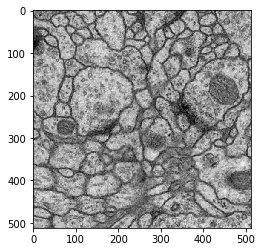

In [169]:
plt.imshow(img_arr.reshape(512, 512), cmap='gray');

In [176]:
img = Image.fromarray(img_arr.reshape(512, 512).astype('uint8'), 'L')

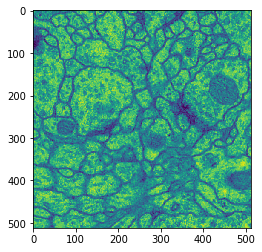

In [177]:
plt.imshow(img);

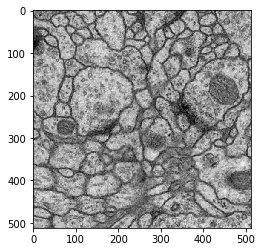

In [178]:
plt.imshow(img, cmap='gray');

In [179]:
np.array(img).shape

(512, 512)

In [180]:
np.array(img)

array([[126, 107, 122, ..., 161, 164, 177],
       [138, 118, 123, ..., 153, 149, 153],
       [141, 135, 145, ..., 144, 145, 137],
       ...,
       [155, 149, 168, ..., 139, 115, 120],
       [163, 154, 166, ..., 158, 141, 148],
       [151, 141, 160, ..., 183, 164, 171]], dtype=uint8)

In [181]:
img = Image.fromarray(img_arr.reshape(512, 512).astype('uint8'), 'P')

In [182]:
np.array(img).shape

(512, 512)

In [183]:
np.array(img)

array([[126, 107, 122, ..., 161, 164, 177],
       [138, 118, 123, ..., 153, 149, 153],
       [141, 135, 145, ..., 144, 145, 137],
       ...,
       [155, 149, 168, ..., 139, 115, 120],
       [163, 154, 166, ..., 158, 141, 148],
       [151, 141, 160, ..., 183, 164, 171]], dtype=uint8)

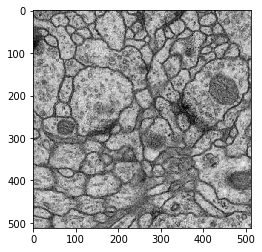

In [184]:
plt.imshow(img);

In [185]:
img = transforms.ToPILImage()(img_arr)

In [186]:
type(img), np.array(img).shape

(PIL.Image.Image, (512, 512))

In [188]:
np.array(img)

array([[126, 107, 122, ..., 161, 164, 177],
       [138, 118, 123, ..., 153, 149, 153],
       [141, 135, 145, ..., 144, 145, 137],
       ...,
       [155, 149, 168, ..., 139, 115, 120],
       [163, 154, 166, ..., 158, 141, 148],
       [151, 141, 160, ..., 183, 164, 171]], dtype=uint8)

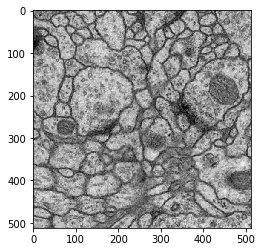

In [187]:
plt.imshow(img, cmap='gray');

In [189]:
data_dir = Path.home() / 'data/isbi2012/'
path_img_train=data_dir / 'train-volume.tif'
image_arrays = TiffFile(path_img_train).asarray()

In [190]:
img_arr = image_arrays[0]

In [191]:
img_arr

array([[126, 107, 122, ..., 161, 164, 177],
       [138, 118, 123, ..., 153, 149, 153],
       [141, 135, 145, ..., 144, 145, 137],
       ...,
       [155, 149, 168, ..., 139, 115, 120],
       [163, 154, 166, ..., 158, 141, 148],
       [151, 141, 160, ..., 183, 164, 171]], dtype=uint8)

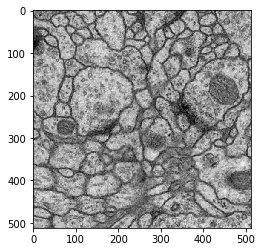

In [201]:
img = transforms.ToPILImage()(img_arr)
plt.imshow(img, cmap='gray');

In [202]:
type(img)

PIL.Image.Image

## `.tif` image (2)

Can we read `.tif` file with `PIL` directly?

In [210]:
data_dir = Path.home() / 'data/isbi2012/'
path_img_train=data_dir / 'train-volume.tif'

In [211]:
image_tiff = Image.open(path_img_train)

In [212]:
type(image_tiff)

PIL.TiffImagePlugin.TiffImageFile

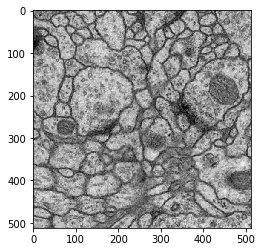

In [216]:
plt.imshow(image_tiff, cmap='gray');

In [224]:
image_tiff.seek(0)

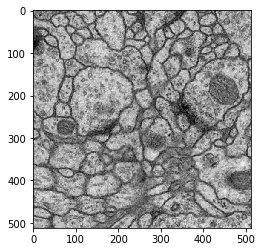

In [226]:
plt.imshow(image_tiff, cmap='gray');

In [233]:
image_tiff.seek(10)

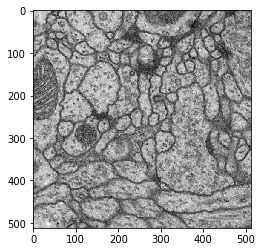

In [234]:
plt.imshow(image_tiff, cmap='gray');

In [242]:
img_arr = np.array(image_tiff)

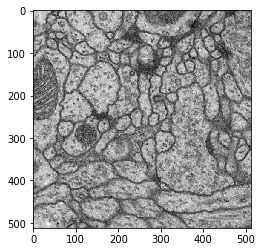

In [243]:
plt.imshow(img_arr, cmap='gray');

In [244]:
img = Image.fromarray(np.array(image_tiff))

In [245]:
type(img)

PIL.Image.Image

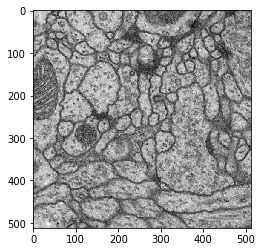

In [246]:
plt.imshow(img, cmap='gray');